In [1]:
import pandas as pd
from pandas import read_csv 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikita_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import Input 
from tensorflow.keras import Model
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Flatten
import numpy as np
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

In [2]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(dftrain,_),(dftest,_)=fashion_mnist.load_data()

In [4]:
dftrain.shape

(60000, 28, 28)

In [5]:
dftest.shape

(10000, 28, 28)

In [6]:
dftrain1=dftrain/255
dftest1=dftest/255

In [7]:
dftrain1=np.expand_dims(dftrain1,axis=-1)

In [8]:
dftrain1.shape

(60000, 28, 28, 1)

In [9]:
dftest1=np.expand_dims(dftest1,axis=-1)
dftest1.shape

(10000, 28, 28, 1)

In [10]:
def autoencoder(input_shape=(28,28,1), enco_size=32, alpha=.02): 
    input=Input(shape=input_shape) 
    encode=Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same')(input)
    encode=LeakyReLU(alpha=alpha)(encode) 
    encode=BatchNormalization()(encode)
    encode=Conv2D(filters=64, kernel_size=(3,3), strides=2, padding='same')(encode)
    encode=LeakyReLU(alpha=alpha)(encode) 
    encode=BatchNormalization()(encode)

    #define output for encoder

    out_shape=encode.shape
    encode=Flatten()(encode) 
    out=Dense(enco_size)(encode)
    model=Model(input,out) 
  
    #decoder
    decoder_input=Input (shape=(enco_size,))
    target_shape=tuple(out_shape[1:])
    decoder=Dense(np.prod(target_shape))(decoder_input) 
    decoder=Reshape(target_shape)(decoder)
    decoder=Conv2DTranspose(filters=64, kernel_size=(3,3), strides=2, padding='same')(decoder)
    decoder=LeakyReLU(alpha=alpha)(decoder) 
    decoder=BatchNormalization()(decoder)
    decoder=Conv2DTranspose(filters=32, kernel_size=(3,3), strides=2, padding='same')(decoder) 
    decoder=LeakyReLU(alpha=alpha) (decoder)
    decoder=BatchNormalization() (decoder)

    #define output for decoder

    decoder_out=Conv2DTranspose(filters=1, kernel_size=(3,3), padding='same', activation="sigmoid")(decoder) 
    decoder_model=Model(decoder_input, decoder_out)

    #define auto encoder
    encoded_model_output=model(input) 
    decoded_model_output=decoder_model(encoded_model_output)
    auto=Model(input, decoded_model_output) 
    return model, decoder_model, auto

In [11]:
encoder,decoder,autoencoder_model=autoencoder(enco_size=256)

In [12]:
autoencoder_model.compile(optimizer="adam", loss="mse")

In [13]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                             

In [14]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense_1 (Dense)             (None, 3136)              805952    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                           

In [15]:
autoencoder_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 256)               822272    
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         862017    
                                                                 
Total params: 1,684,289
Trainable params: 1,683,905
Non-trainable params: 384
_________________________________________________________________


In [ ]:
history= autoencoder_model.fit(dftrain1,dftrain1,epochs=120,batch_size=1024,validation_data=(dftest1,dftest1)) 

In [17]:
#Sending INfo
dftrain[0].shape 

(28, 28)

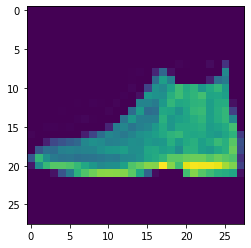

In [18]:
import matplotlib.pyplot as plt
plt.imshow(dftest[0])

In [19]:
dftest1[0].shape

(28, 28, 1)

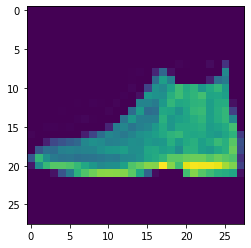

In [20]:
plt.imshow(dftest1[0])

In [21]:
img=dftest1[0]
img=img.reshape(1,28,28,1)
encoded_data=encoder.predict(img) 
encoded_data=encoded_data.reshape(16,16)

1/1 [==============================] - 0s 319ms/step


In [22]:
encoded_data.shape

(16, 16)

Encoded Data Plot


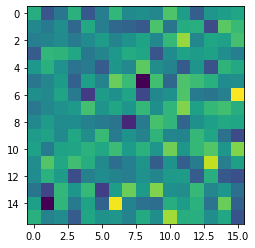

In [23]:
print("Encoded Data Plot")
plt.imshow(encoded_data)

In [24]:
def Cover_encoder (encoder, img1, path_cover_img):
    img1=img1.reshape(1,28,28,1) 
    k2=encoder.predict(img1)
    k2=k2.T

    k2=k2.flatten() 
    k2=np.pad(k2, (0,9744), 'constant')

    img=load_img(path_cover_img, grayscale=True, target_size=(100,100))
    from tensorflow.keras.preprocessing.image import img_to_array
    img1=img_to_array(img)

    img1=img1.reshape(10000,1)

    img1=img1.flatten() 
    img2=img1+k2

    img3=img2.reshape(100, 100, 1) 
    from tensorflow.keras.preprocessing.image import array_to_img

    img3=array_to_img(img3)

    return img3

In [25]:
path="railroad-g0de6b9f2f_640.jpg"

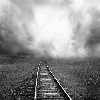

In [27]:
load_img(path, color_mode="grayscale", target_size=(100, 100))

In [28]:
send_data=Cover_encoder(encoder,dftest1[0], path)

1/1 [==============================] - 0s 41ms/step


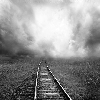

In [29]:
send_data

In [30]:
def receive_info(decoder, path, send_data):
    from tensorflow.keras.preprocessing.image import img_to_array
    k=img_to_array(send_data)
    img1=k.reshape(10000,1) 
    img1=img1.flatten()
    img=load_img(path, grayscale=True, target_size=(100, 100)) 
    img2=img_to_array(img)
    img2=img2.reshape(10000,1) 
    img2=img2.flatten()
    k1=img1-img2
    k2=k1[0:256]
    k2= np.reshape(k2, (256,1)) 
    k2=k2.T
    k3=decoder.predict(k2)
    k3=k3.reshape(28,28)
    return k3

In [31]:
k4=receive_info(decoder, path, send_data)

1/1 [==============================] - 1s 988ms/step


Received Data


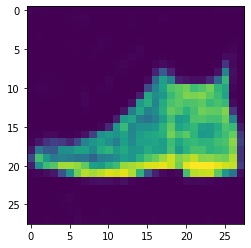

In [32]:
print("Received Data")
plt.imshow(k4)

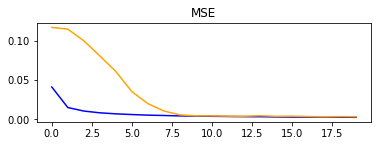

In [33]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title("MSE") 
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="orange", label="test")